In [17]:
# Importing required packages
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

import time


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


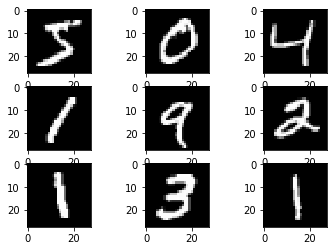

In [18]:
# load the data and view the first few fugures

(Train_X, Train_Y), (Test_X, Test_Y) = mnist.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (Train_X.shape, Train_Y.shape))
print('Test: X=%s, y=%s' % (Test_X.shape, Test_Y.shape))

# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(Train_X[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()





In [19]:

## Start time 
t0 = time.time()


# MNIST -- load data 
def load_dataset():
    # load MNIST data
    (Train_X, Train_Y), (Test_X, Test_Y) = mnist.load_data()
    
    # reshape the dataset for modelling
    Train_X = Train_X.reshape((Train_X.shape[0], 28, 28, 1))
    Test_X = Test_X.reshape((Test_X.shape[0], 28, 28, 1))
    
    # one hot encode the y variable
    Train_Y = to_categorical(Train_Y)
    Test_Y = to_categorical(Test_Y)
    
    return Train_X, Train_Y, Test_X, Test_Y

In [20]:
# Now performe the pixels scalling

def prep_pixels(train, test):
    
    # integers to float convertion
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    
    # normalize the data to 0 - 1 
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    
    # return normalized values
    return train_norm, test_norm
 

In [21]:
# # Now define the CNN model with added layers.
# using Relu activation function and BatchNormaization
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', 
                     input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    # Adding Batch normalization.
    model.add(BatchNormalization())
    # adding Dropout to reduce the overfitting 
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [22]:
##  Kfold Cross validation implementation for (k = 5)

def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        
    # define model
        model = define_model()
        # select rows for train and test
        Train_X, Train_Y, Test_X, Test_Y = dataX[train_ix], dataY[train_ix], 
        dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(Train_X, Train_Y, epochs=10, batch_size=32, 
                            validation_data=(Test_X, Test_Y), verbose=0)
        # evaluate model
        _, acc = model.evaluate(Test_X, Test_Y, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [23]:
## The code for learning curve plot is:
# learning curve helps use to understand the model performance

def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(2, 1, 1)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        pyplot.subplot(2, 1, 2)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    pyplot.show()

In [24]:
# Summerize the performance of the model
def summarize_performance(scores):
    
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % 
          (mean(scores)*100, std(scores)*100, len(scores)))
    
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()

In [25]:
## Evaluate the model using K-fold cross validation
def run_perform_harness():
    
    # loading the dataset
    Train_X, Train_Y, Test_X, Test_Y = load_dataset()
    
    # pixel data preparation
    Train_X, Test_X = prep_pixels(Train_X, Test_X)
    
    # Model Evaluation
    scores, histories = evaluate_model(Train_X, Train_Y)
    
    # learning curves
    summarize_diagnostics(histories)
    
    # summarize estimated performance
    summarize_performance(scores)
 

> 98.883
> 98.925
> 99.142
> 99.100
> 98.925


C:\Users\datas\anaconda3\envs\TensorFlow\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
C:\Users\datas\anaconda3\envs\TensorFlow\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
C:\Users\datas\anaconda3\envs\TensorFlow\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the

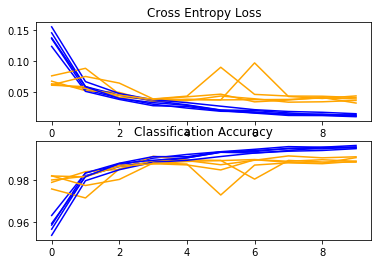

Accuracy: mean=98.995 std=0.105, n=5


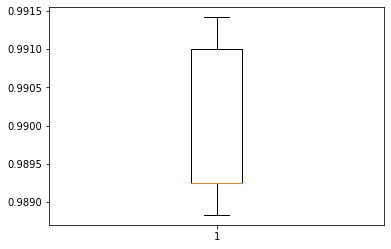

In [26]:
# Run the Model evalution 
run_perform_harness()


In [27]:
# run the test harness for evaluating a model
def run_test_harness():
        
    # loadind the dataset
    Train_X, Train_Y, Test_X, Test_Y = load_dataset()
    
    # pixel data preparation
    Train_X, Test_X = prep_pixels(Train_X, Test_X)

    # define model
    model = define_model()
    
    # fit model
    model.fit(Train_X, Train_Y, epochs=10, batch_size=32, verbose=0)

    
    # Check the accuracy of the model
    _, Accuracy = model.evaluate(Test_X, Test_Y, verbose=0)
    print('> %.3f' % (Accuracy * 100.0))

In [28]:
# Run the complete model for test harness
run_test_harness()

> 99.330


In [29]:
#display run time
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)

Example run in 25203.071 s
